In [242]:
import numpy as np 
import pandas as pd 
from datetime import datetime

In [243]:
df = pd.read_csv("waypoints1-robot-dlo-odom_node-odom.csv")
df.head()

,time,PosX,PosY,OriantationX,OriantationY,OriantationZ,OriantationW
0,2022/08/16/12:40:09.957258,-0.002952,-0.000174,0.000700,-0.000224,-0.000038,1.0
1,2022/08/16/12:40:10.057131,0.003097,-0.000733,0.000504,-0.000260,0.000089,1.0
2,2022/08/16/12:40:10.157066,0.004766,-0.000700,0.000681,-0.000268,0.000069,1.0
3,2022/08/16/12:40:10.256724,0.000553,-0.000429,0.000578,-0.000245,0.000094,1.0
4,2022/08/16/12:40:10.356861,0.002144,-0.000451,0.000530,-0.000254,0.000072,1.0


In [244]:
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0      2022-08-16 12:40:09.957258
1      2022-08-16 12:40:10.057131
2      2022-08-16 12:40:10.157066
3      2022-08-16 12:40:10.256724
4      2022-08-16 12:40:10.356861
                  ...            
1011   2022-08-16 12:41:51.064241
1012   2022-08-16 12:41:51.163516
1013   2022-08-16 12:41:51.263658
1014   2022-08-16 12:41:51.364442
1015   2022-08-16 12:41:51.463954
Name: time, Length: 1016, dtype: datetime64[ns]

In [245]:
df.head(5)

,time,PosX,PosY,OriantationX,OriantationY,OriantationZ,OriantationW
0,2022-08-16 12:40:09.957258,-0.002952,-0.000174,0.000700,-0.000224,-0.000038,1.0
1,2022-08-16 12:40:10.057131,0.003097,-0.000733,0.000504,-0.000260,0.000089,1.0
2,2022-08-16 12:40:10.157066,0.004766,-0.000700,0.000681,-0.000268,0.000069,1.0
3,2022-08-16 12:40:10.256724,0.000553,-0.000429,0.000578,-0.000245,0.000094,1.0
4,2022-08-16 12:40:10.356861,0.002144,-0.000451,0.000530,-0.000254,0.000072,1.0


In [246]:
import math 
import matplotlib.pyplot as plt
import datetime 

In [247]:
lastPx = 0 
lastPy = 0 
lastT = 0 
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    
    vMag.append(math.sqrt(currentVx**2 + currentVy**2))
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
# print(t)

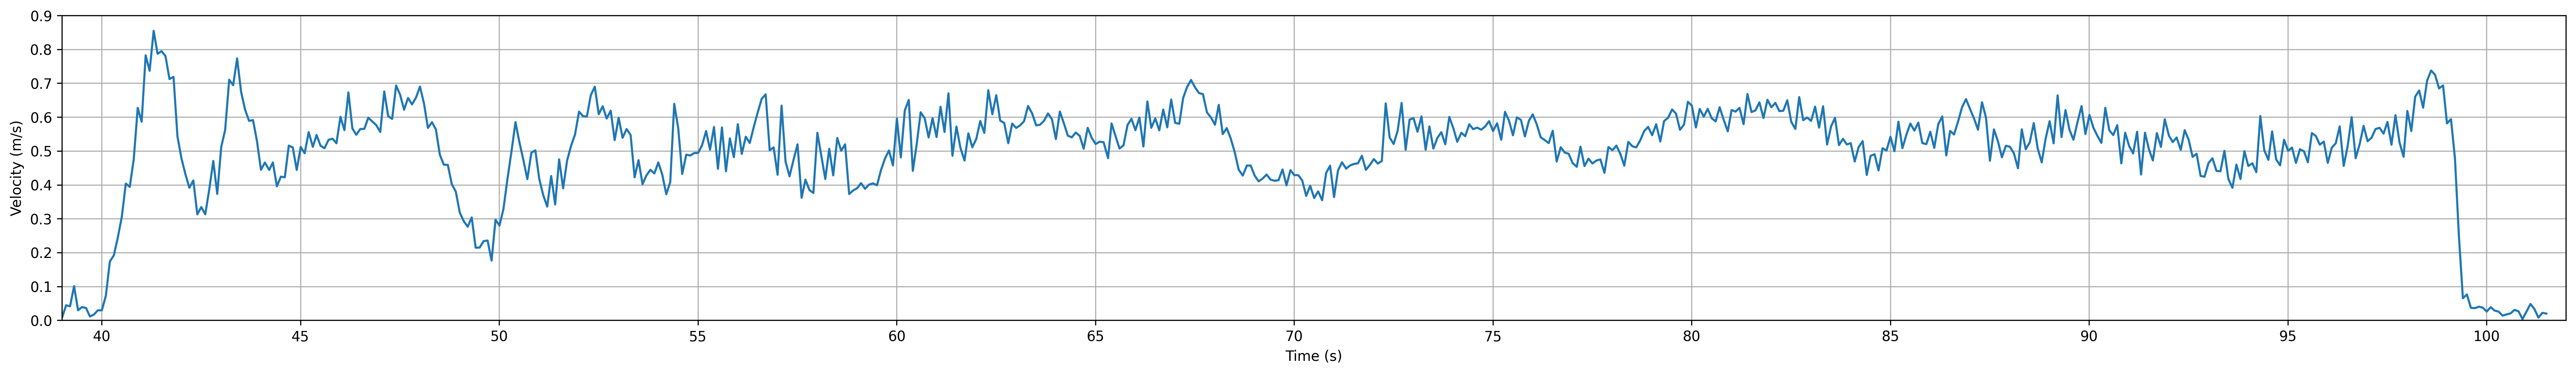

In [253]:
plt.figure(dpi=300, figsize=(32,4))
plt.grid()
plt.xlim(39,102)
plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

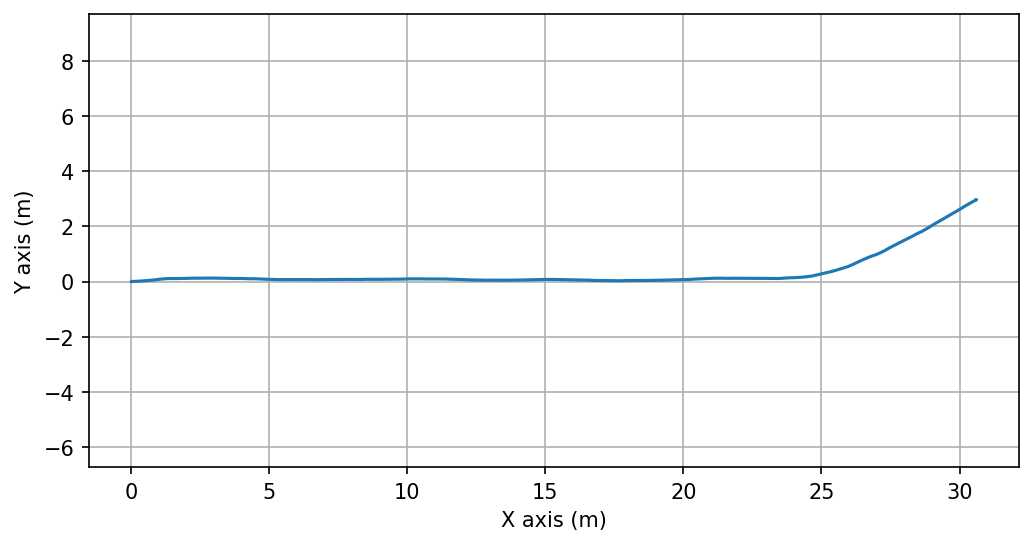

In [257]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)
